In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram

In [ ]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd


In [ ]:
x, sr = librosa.load('/content/drive/My Drive/taunt.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(180783,) 44100


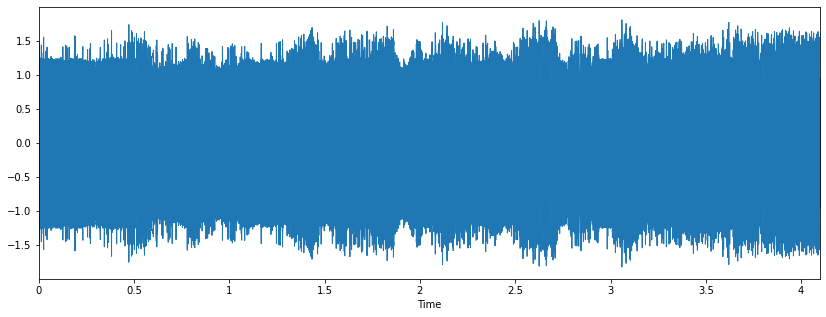

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

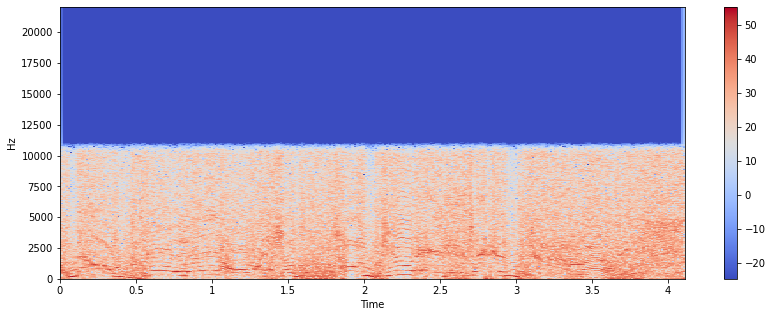

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

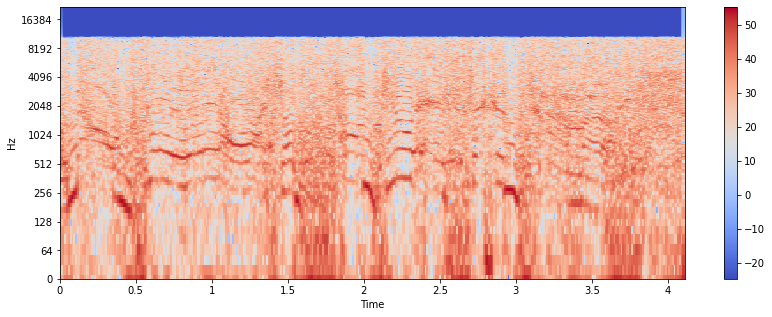

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
filename = librosa.util.example_audio_file()
y, sr = librosa.load(filename)
y = y[:100000] # shorten audio a bit for speed

window_size = 1024
window = np.hanning(window_size)
stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
out = 2 * np.abs(stft) / np.sum(window)

# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
fig.savefig('spec.png')